https://arxiv.org/pdf/1801.09573.pdf

We wanted to find other neural network in order to compare with the initial one. We wanted to change certain layers and select fonctionalities in order to improve the efficiency of image classification.

We found a paper from the Department of Computer Science of Mongolian University of Science and Technology called "Deep Learning Approach for Very Similar Objects Recognition Application Chihuahua and Muffin Problem". In this paper, we could find an efficient example of neural network. We wanted to get inspired by it to create a new one. 

Here the steps until the neural network and the confusion matrix in order to verify its accuracy. 

Import librairies 

In [ ]:
import sys
import tensorflow as tf
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import itertools  

Set the paths for training, testing and validation 

In [ ]:
path = "/ChihuahuaVSMuffin"
train_data_path = "/ChihuahuaVSMuffin/train"
test_data_path = "/ChihuahuaVSMuffin/test"
valid_data_path = "/ChihuahuaVSMuffin/validation"

Set image size and batch size 





In [ ]:
# Set image size and batch size


img_rows = 224

img_cols = 224

batch_size = 10



img_rows = 250
img_cols = 250
batch_size = 10




Set Data Generator for training, testing and validataion.

Note for testing, set shuffle = false (For proper Confusion matrix)






In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5)
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)


valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory(valid_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)


test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=False)

Found 527 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


Function for plots images with labels within jupyter notebook




In [ ]:
def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
  
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1

    for i in range(len(ims)):
        sp = f.add_subplot(cols, rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')




Check the training set (with batch of 10 as defined above


In [ ]:
imgs, labels = next(train_generator)

Images are shown in the output

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


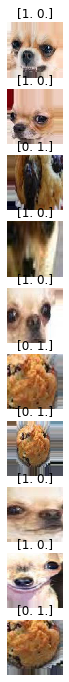

In [ ]:
plots(imgs, titles=labels)

Images Classes with index

In [ ]:
print(train_generator.class_indices)

{'Chihuahua': 0, 'Muffin': 1}


Model Creation / Sequential

In [ ]:
IMG_SIZE = 150

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', 

                           input_shape=(img_rows, img_cols, 3)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.GlobalAvgPool2D(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax'),
           
])

In [ ]:
model.output_shape

(None, 2)

Get summary of the model

In [ ]:
model.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 248, 248, 128)     3584      
_________________________________________________________________
dense_105 (Dense)            (None, 248, 248, 128)     16512     
_________________________________________________________________
global_average_pooling2d_11  (None, 128)               0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 128)               0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 2)                 258       
Total params: 20,354
Trainable params: 20,354
Non-trainable params: 0
_________________________________________________

Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Train the model

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=20, validation_data=valid_generator, validation_steps=4, epochs=25)


Epoch 1/25
20/20 [==============================] - 3s 170ms/step - loss: 10.1231 - accuracy: 0.5533 - val_loss: 2.3225 - val_accuracy: 0.7917
Epoch 2/25
20/20 [==============================] - 3s 155ms/step - loss: 3.6523 - accuracy: 0.6396
Epoch 3/25
20/20 [==============================] - 3s 152ms/step - loss: 3.1291 - accuracy: 0.6701
Epoch 4/25
20/20 [==============================] - 3s 154ms/step - loss: 1.4392 - accuracy: 0.7300
Epoch 5/25
20/20 [==============================] - 3s 148ms/step - loss: 1.2968 - accuracy: 0.7450
Epoch 6/25
20/20 [==============================] - 3s 149ms/step - loss: 0.7098 - accuracy: 0.7950
Epoch 7/25
20/20 [==============================] - 3s 150ms/step - loss: 0.5029 - accuracy: 0.8300
Epoch 8/25
20/20 [==============================] - 3s 151ms/step - loss: 0.3841 - accuracy: 0.8500
Epoch 9/25
20/20 [==============================] - 3s 150ms/step - loss: 0.4993 - accuracy: 0.8200
Epoch 10/25
20/20 [==============================] - 3s 1

Get the accuracy score

In [ ]:
test_score = model.evaluate_generator(test_generator, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

[INFO] accuracy: 75.86%
[INFO] Loss:  0.81344074010849


**Plot the Graph**


Loss Curves

Text(0.5, 1.0, 'Loss Curves')

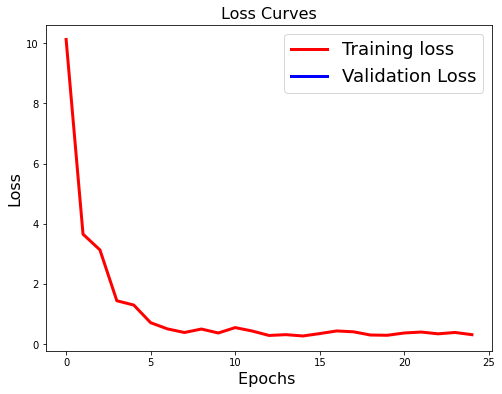

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Accuracy Curves

Text(0.5, 1.0, 'Accuracy Curves')

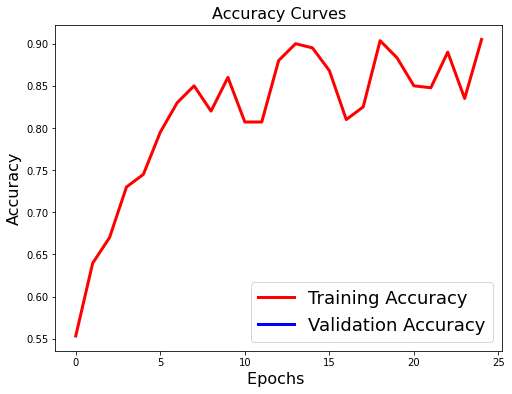

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Plot the confusion matrix. Set Normalize = True/False

Print the Target names

In [ ]:
target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)

Confution Matrix 

Confusion Matrix
Normalized confusion matrix


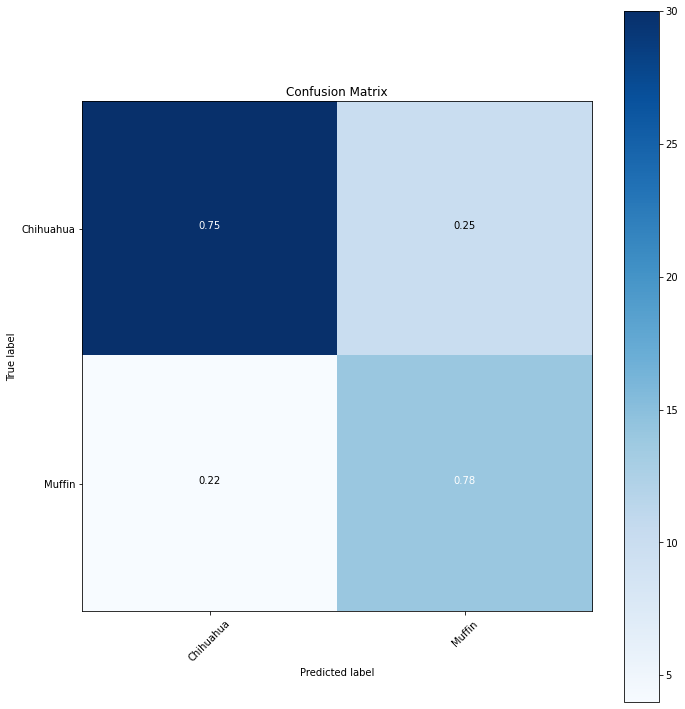

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

Print Classification Report

In [ ]:
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   Chihuahua       0.88      0.75      0.81        40
      Muffin       0.58      0.78      0.67        18

    accuracy                           0.76        58
   macro avg       0.73      0.76      0.74        58
weighted avg       0.79      0.76      0.77        58

